In [86]:
# DataFrame
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Others
import re
import numpy as np
from collections import Counter

#Loading the Dataset

In [49]:
data = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding='latin-1', names=['Polarity', 'Id', 'Date', 'Query', 'User', 'Text'])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Polarity  1600000 non-null  int64 
 1   Id        1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Query     1600000 non-null  object
 4   User      1600000 non-null  object
 5   Text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


data.sample() - Returns a random sample of items from an axis of object.
* DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

In [51]:
data = data.sample(frac=1)
data = data[:200000]

#Data Visualization

Details of the Dataset:

It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)

In [52]:
print("Dataset shape", data.shape)

Dataset shape (200000, 6)


In [53]:
data.head(10)

,Polarity,Id,Date,Query,User,Text
306508,0,2000257657,Mon Jun 01 21:43:54 PDT 2009,NO_QUERY,JCCub1,On a prop plane from CBR-SYD Yuck! Not a fan o...
1490054,4,2068801644,Sun Jun 07 14:43:29 PDT 2009,NO_QUERY,pretenda,@SingMeASong oh how nice it would be to do tha...
839054,4,1559291036,Sun Apr 19 10:45:26 PDT 2009,NO_QUERY,peace_n_love22,Jus woke up!!!!!!! Crazy night
781789,0,2323495275,Thu Jun 25 00:46:41 PDT 2009,NO_QUERY,Cheryll16,had to sleep early last night. had a BIG fight...
1471004,4,2065134524,Sun Jun 07 07:58:12 PDT 2009,NO_QUERY,hallie_redqueen,It's all becoming very clear. Granted it wasn...
1241642,4,1994041291,Mon Jun 01 11:19:16 PDT 2009,NO_QUERY,JasmineBarton,@dougiemcfly please please PLEASE say hey to @...
752059,0,2286325668,Mon Jun 22 16:17:34 PDT 2009,NO_QUERY,jroerdink,"@vsmama, Sorry to hear that. Praying!"
1036758,4,1956404154,Thu May 28 21:48:23 PDT 2009,NO_QUERY,TroublemakerSup,@the78msj &quot;ah got nuttin but love fa ya b...
347494,0,2016473741,Wed Jun 03 06:50:24 PDT 2009,NO_QUERY,AshBryans,@parisrouzati not now that I have a blackberry...
1357983,4,2048117087,Fri Jun 05 14:41:21 PDT 2009,NO_QUERY,adambarber,@OhGollyItsHolly That makes me happy.


In [54]:
data['Polarity'].unique()

array([0, 4])

The Polarity field has two values 4 and 0 so we change 4 to 0 for ease of understanding.

In [55]:
data['Polarity'] = data['Polarity'].replace(4,1)
data.head()

,Polarity,Id,Date,Query,User,Text
306508,0,2000257657,Mon Jun 01 21:43:54 PDT 2009,NO_QUERY,JCCub1,On a prop plane from CBR-SYD Yuck! Not a fan o...
1490054,1,2068801644,Sun Jun 07 14:43:29 PDT 2009,NO_QUERY,pretenda,@SingMeASong oh how nice it would be to do tha...
839054,1,1559291036,Sun Apr 19 10:45:26 PDT 2009,NO_QUERY,peace_n_love22,Jus woke up!!!!!!! Crazy night
781789,0,2323495275,Thu Jun 25 00:46:41 PDT 2009,NO_QUERY,Cheryll16,had to sleep early last night. had a BIG fight...
1471004,1,2065134524,Sun Jun 07 07:58:12 PDT 2009,NO_QUERY,hallie_redqueen,It's all becoming very clear. Granted it wasn...


In [56]:
data.describe()

,Polarity,Id
count,200000.000000,2.000000e+05
mean,0.500625,1.998528e+09
std,0.500001,1.934972e+08
min,0.000000,1.467811e+09
25%,0.000000,1.956823e+09
50%,1.000000,2.002041e+09
75%,1.000000,2.176979e+09
max,1.000000,2.329204e+09


We check the number of posivite tagged and negative tagged tweets.

In [57]:
positive = data['Polarity'][data['Polarity'] == 0].count()
negative = data['Polarity'][data['Polarity'] == 1].count()
print("Total length of data: ", len(data))
print("Positive tweets: ", positive)
print("Negative tweets: ", negative)

Total length of data:  200000
Positive tweets:  99875
Negative tweets:  100125


Word count for Positive and Negative

In [59]:
def count_words(words):
    return len(words.split())

In [60]:
data['Word count'] = data['Text'].apply(count_words)
p = data["Word count"][data.Polarity == 1]
n = data["Word count"][data.Polarity == 0]

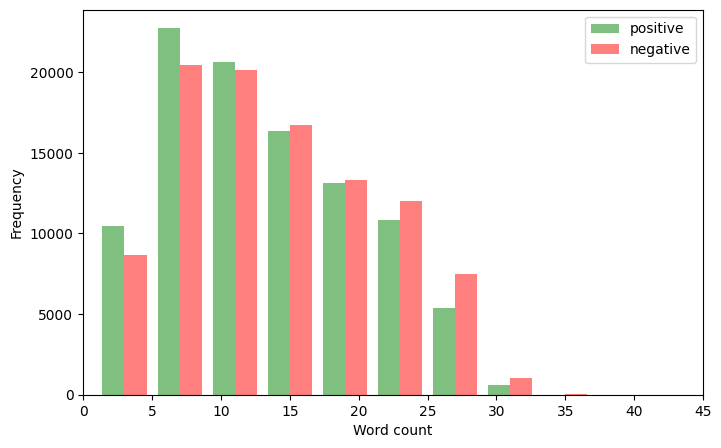

In [61]:
plt.figure(figsize=(8,5))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

Getting all the common words in the dataset.

In [62]:
all_words = []

for line in data['Text']:
    words = line.split()
    for word in words:
        if len(word) >= 3:
            all_words.append(word.lower())

In [63]:
Counter(all_words).most_common(15)

[('the', 64427),
 ('and', 37031),
 ('you', 29830),
 ('for', 26778),
 ('have', 17888),
 ('that', 15959),
 ("i'm", 15950),
 ('just', 15677),
 ('but', 15609),
 ('with', 14190),
 ('not', 12737),
 ('was', 12675),
 ('this', 11023),
 ('get', 10003),
 ('good', 9692)]

#Processing the data

Dropping the unnecessary columns

In [64]:
columns = ['Date', 'Query', 'User', 'Word count', 'Id']
data.drop(columns, axis=1, inplace=True)

In [65]:
data.head()

,Polarity,Text
306508,0,On a prop plane from CBR-SYD Yuck! Not a fan o...
1490054,1,@SingMeASong oh how nice it would be to do tha...
839054,1,Jus woke up!!!!!!! Crazy night
781789,0,had to sleep early last night. had a BIG fight...
1471004,1,It's all becoming very clear. Granted it wasn...


In [67]:
# checking for any null values
data.isnull().sum()

,0
Polarity,0
Text,0


In [68]:
data['Text'] = data['Text'].astype(str)

In [70]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'him', "won't", "that'll", 'between', 'up', 'haven', 'we', "haven't", 'himself', 'her', "hadn't", 'this', 'ourselves', 'at', 'where', 'that', 'all', 'couldn', 'while', 'same', 'too', "hasn't", 'down', 'under', 'herself', 'his', 'until', 'during', 'by', "mightn't", 've', 'both', 'theirs', "you'd", 'out', 'o', 'for', 'your', 'me', 'them', 'an', "needn't", 'each', 'our', "should've", 'is', 'now', 'are', 'weren', "wouldn't", 'when', 'other', 'in', 'can', 'y', 'doesn', 'mustn', "you've", 'once', 'ain', 'some', "mustn't", 'more', 'isn', 're', 'they', 'then', 'my', 'being', 'its', 'yours', 'why', 'd', 'but', 'further', 'mightn', 'with', 'themselves', 'no', 'as', 'been', 'nor', "shouldn't", "wasn't", 'again', 'the', "weren't", 'shan', 'what', 'needn', 'wouldn', "it's", 'yourselves', 'don', 'whom', 'does', 'ours', 'on', 'only', 'did', "she's", 'she', 'very', 'you', 'below', 'am', 'before', 'hasn', 'after', 'just', 'most', 'will', 'about', 'these', 'which', 'having', 'so', 'than', "didn't", "co

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [71]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

###The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".
* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Stopwords: A stopword is a commonly used word (such as “the”, “a”, “an”, or “in”) which doed not add much meaning to a sentence, so they can safely be removed without saacrificing the meaning of the sentence.
* Lemmatizing: Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Simply put we convert a word to its base form. (playing to play)

###Some other tasks mey include:
* Removing leading and trailing whitespaces.
* Changing cases.
* Removing HTML tags.
* Numeric values to thrir text representations.
* Removing punctuation.

In [77]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

def process(tweet):

    # lower casing the tweets
    tweet = tweet.lower()
    tweet=tweet[1:]

    # removing URLs
    tweet = re.sub(urlPattern,'',tweet)

    # removing all usernames
    tweet = re.sub(userPattern,'',tweet)

    # removing all punctuations
    tweet = re.sub(r'[^\w\s]','',tweet)

    # tokenizeing words
    tokens = word_tokenize(tweet)

    # stopword removal
    filtered_words = [w for w in tokens if w not in stopword]

    # lemmatizing
    lemma_words = []
    for w in filtered_words:
        if len(w)>1:
            word = WordNetLemmatizer().lemmatize(w)
            lemma_words.append(word)

    return " ".join(lemma_words)

In [79]:
%%time
data['Processed_Tweets'] = data['Text'].apply(lambda x: process(x))
print("processing done")

processing done
CPU times: user 36.7 s, sys: 102 ms, total: 36.8 s
Wall time: 37.2 s


In [80]:
data.head(10)

,Polarity,Text,Processed_Tweets
306508,0,On a prop plane from CBR-SYD Yuck! Not a fan o...,prop plane cbrsyd yuck fan prop plane
1490054,1,@SingMeASong oh how nice it would be to do tha...,singmeasong oh nice would great song
839054,1,Jus woke up!!!!!!! Crazy night,u woke crazy night
781789,0,had to sleep early last night. had a BIG fight...,ad sleep early last night big fight dad turned...
1471004,1,It's all becoming very clear. Granted it wasn...,t becoming clear granted wasnt part plan least...
1241642,1,@dougiemcfly please please PLEASE say hey to @...,dougiemcfly please please please say hey love ...
752059,0,"@vsmama, Sorry to hear that. Praying!",vsmama sorry hear praying
1036758,1,@the78msj &quot;ah got nuttin but love fa ya b...,the78msj quotah got nuttin love fa ya babyquot...
347494,0,@parisrouzati not now that I have a blackberry...,parisrouzati blackberry storm way slow hang ca...
1357983,1,@OhGollyItsHolly That makes me happy.,ohgollyitsholly make happy


##Plotting the word-cloud for negative tweets

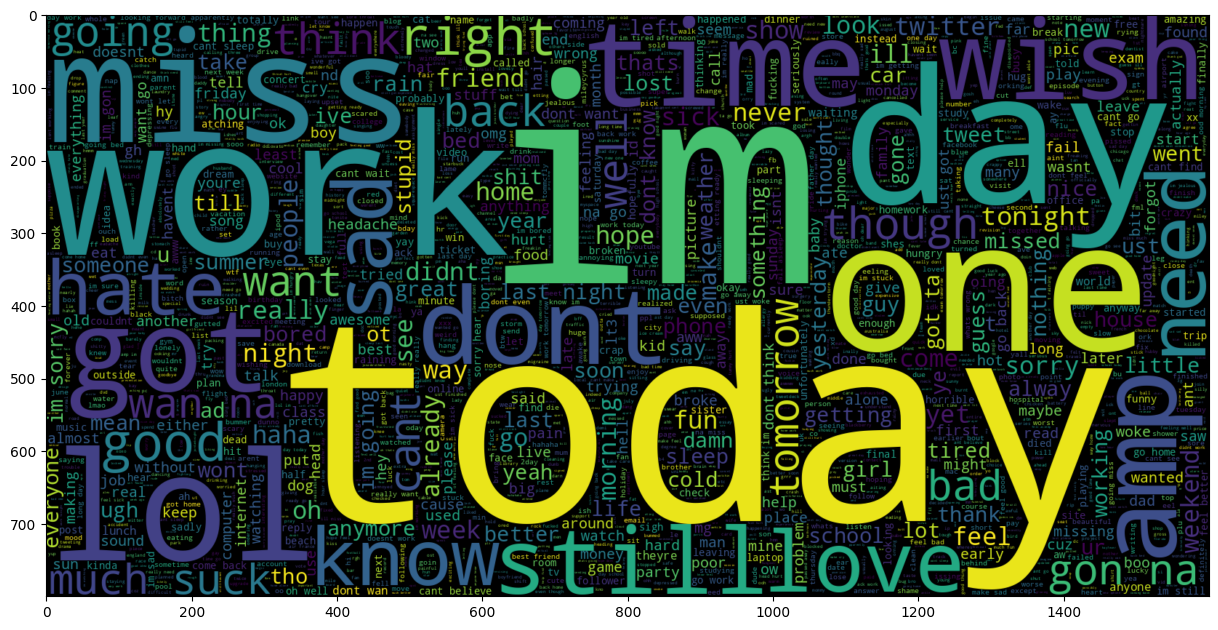

In [84]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Polarity == 0].Processed_Tweets))
plt.imshow(wc , interpolation = 'bilinear')

##Plotting the word-cloud for positive tweets

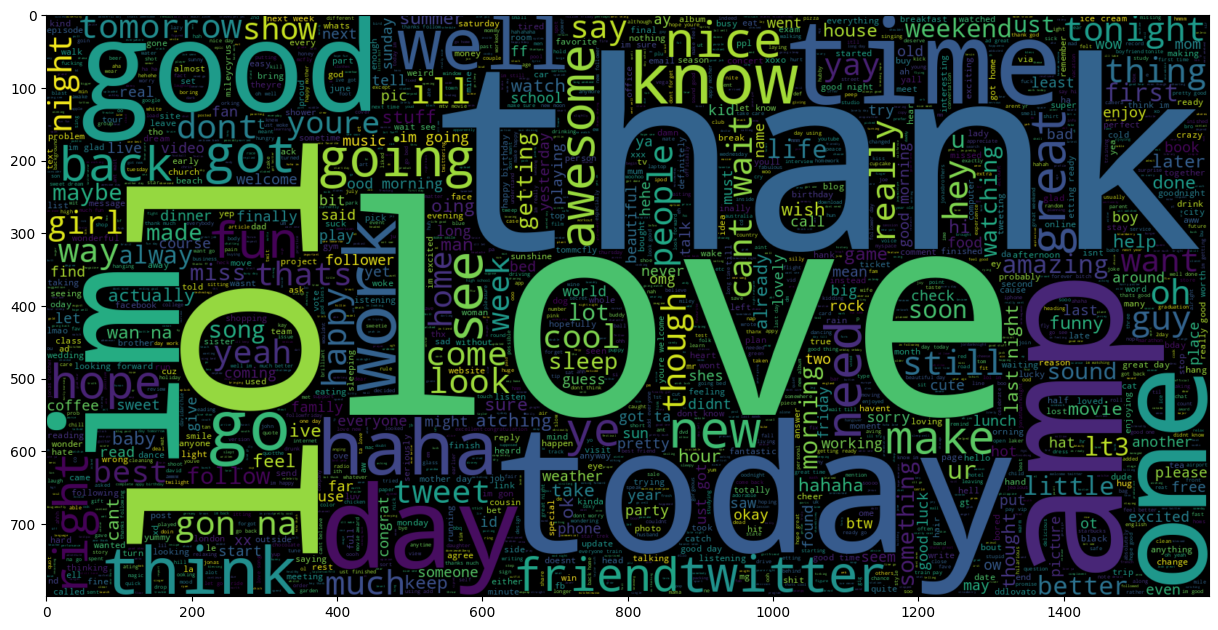

In [85]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Polarity == 1].Processed_Tweets))
plt.imshow(wc , interpolation = 'bilinear')